<a href="https://colab.research.google.com/github/joaoo-vittor/analise-microdados-enem-2019/blob/main/Insight_MicrodadosEnem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analise dos Microdados do Enem 2019


## Sumário do Projeto

1. Introdução

  1.1. Objetivo

  1.2. O que é o Enem?

2. Definição do Problema

  2.1 Objetivo do Projeto

3. Preparação dos Dados
  
  3.1. Obtendo os dados

  3.2. Documentação dos dados

  3.3. Imports

  3.4. Funções auxiliares

4. Análise Exploratória dos Dados

5. Conclusão

### 1. Introdução

#### 1.1. Objetivo

#### 1.2. O que é o Enem:

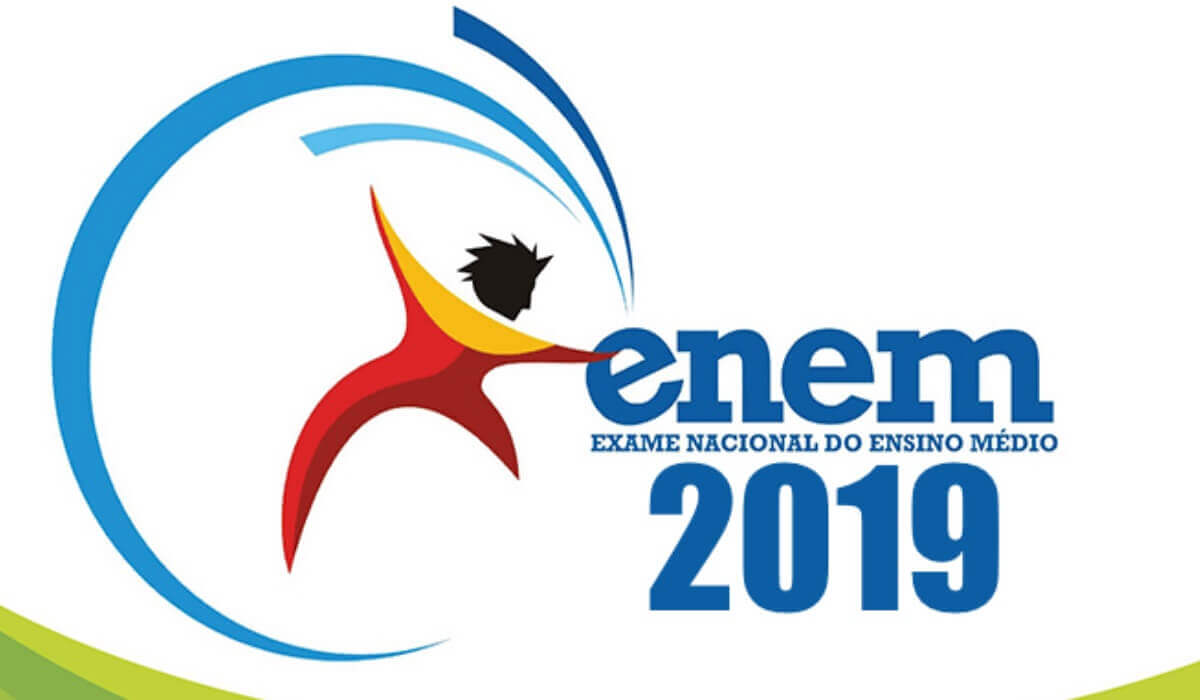

O Exame Nacional do Ensino Médio (Enem) foi instituído em 1998, com o objetivo de avaliar o desempenho escolar dos estudantes ao término da educação básica. O exame aperfeiçoou sua metodologia e, em 2009, passou a ser utilizado como mecanismo de acesso à educação superior, por meio do Sistema de Seleção Unificada (Sisu), do Programa Universidade para Todos (ProUni) e de convênios com instituições portuguesas. Os participantes do Enem também podem pleitear financiamento estudantil em programas do governo, como o Fundo de Financiamento Estudantil (Fies). Os resultados do Enem continuam possibilitando o desenvolvimento de estudos e indicadores educacionais.


### 2. Definição do Problema de Negócio

Neste projeto, utilizaremos os microdados do enem de 2019, com dados do participante, da escola, dos pedidos de atendimento especializado, dos pedidos de atendimento especifico, dos pedidos de atendimento especializado e especifico para a realização da prova, do local de aplicação da prova, da prova objetiva, da redação e do questionário socioeconomico.


#### 2.1 Objetivo do Projeto


Como objetivo do projeto, realizaremos algumas ánalises dos microdados do Enem 2019.

### 3. Preparação dos Dados

#### 3.1. Obtendo Dados:

Os microdados do Inep se constituem no menor nível de desagregação de dados recolhidos por suas pesquisas estatísticas, avaliações e exames. 

*Fonte:* [Inep](https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados)

In [2]:
# Link para download dos microdados
# https://download.inep.gov.br/microdados/microdados_enem_2019.zip

In [3]:
# criando um diretório para guardar os dados
# !mkdir -p "/content/drive/MyDrive/ProjetosDataScience/DataBases/MicrodadosEnem"

In [4]:
# fazendo a requisição dos dados
# !wget -P "/content/drive/MyDrive/ProjetosDataScience/DataBases/MicrodadosEnem" https://download.inep.gov.br/microdados/microdados_enem_2019.zip

In [5]:
# Desconpactando os dados
# !unzip /content/drive/MyDrive/ProjetosDataScience/DataBases/MicrodadosEnem/microdados_enem_2019.zip -d /content/drive/MyDrive/ProjetosDataScience/DataBases/MicrodadosEnem

#### 3.2. Documentação dos dados

No link a baixo você encontrará o Dicionário dos dados trabalhados nesse projeto.

Link: [Dicionário Dados](https://drive.google.com/file/d/13h-ouF8I2P3D-9GplKvUq6dUJ7SJQSl7/view?usp=sharing)

#### 3.3. Imports:


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Setando o style do seaborn
sns.set() 

In [8]:
path_microdados = '/content/drive/MyDrive/ProjetosDataScience/DataBases/MicrodadosEnem/DADOS/MICRODADOS_ENEM_2019.csv'

In [9]:
import chardet

with open(path_microdados, 'rb') as f:
  result = chardet.detect(f.read(100000))
result

{'confidence': 0.73, 'encoding': 'ISO-8859-1', 'language': ''}

#### 3.4. Funções auxiliares

In [10]:
def read_data_counts(path, var, encod='ISO-8859-1', s=';', chuks=100000):
  arr = []
  for chk in pd.read_csv(path, encoding=encod, sep=s, chunksize=chuks):
    arr.append(chk[var].value_counts())
  return pd.concat(arr, ignore_index=False)

In [11]:
def read_data_columns(path, columns=[], encod='ISO-8859-1', s=';', chuks=100000):
  arr = []
  for chk in pd.read_csv(path, encoding=encod, sep=s, chunksize=chuks, usecols=columns):
    arr.append(chk[columns])
  return pd.concat(arr, ignore_index=False)

### 4. Análise Exploratória dos Dados

#### 4.1. Lendo dados do **Participante**:

- **NU_IDADE** - Corresponde a Idade do paricipante

- **TP_ESCOLA** - Corresponde ao de	Tipo de escola do Ensino Médio do paricipante

- **TP_SEXO** - Corresponde ao Sexo do paricipante


In [12]:
df_qtd_tipo_esc = read_data_columns(path_microdados, 
                                    columns=['NU_IDADE','TP_ESCOLA', 'TP_SEXO'])

In [13]:
df_qtd_tipo_esc.head()

,NU_IDADE,TP_ESCOLA,TP_SEXO
0,21,1,M
1,16,1,F
2,18,3,F
3,23,2,M
4,23,1,M


#### 4.2. Qual a maior idade dos alunos:

In [14]:
print(df_qtd_tipo_esc['NU_IDADE'].max(), 'anos')

94 anos


#### 4.3. Qual a menor idade dos alunos:

In [15]:
print(df_qtd_tipo_esc['NU_IDADE'].min(), 'anos')

1 anos


OBS: *Esse(s) aluno(s) com idade tão baixa tem grande chance de ser erro na base de dados*

In [16]:
df_qtd_tipo_esc['NU_IDADE'].value_counts()

18    864186
17    847303
19    577161
20    409385
16    316437
       ...  
91         2
92         1
87         1
88         1
94         1
Name: NU_IDADE, Length: 91, dtype: int64

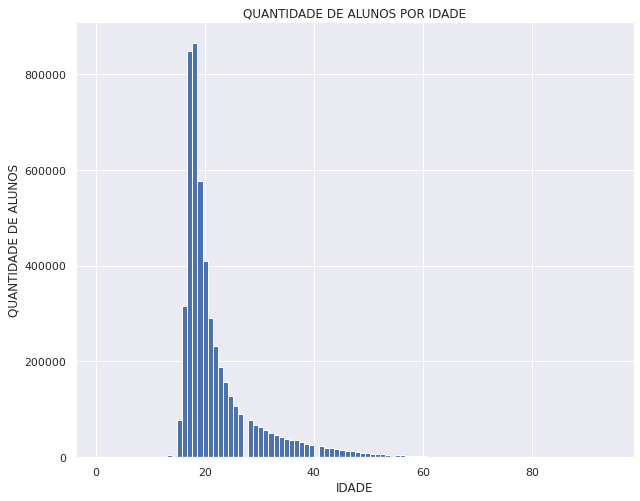

In [17]:
fig, ax = plt.subplots(figsize=(10, 8))
df_qtd_tipo_esc['NU_IDADE'].hist(bins=100)
plt.title('QUANTIDADE DE ALUNOS POR IDADE')
plt.xlabel('IDADE')
plt.ylabel('QUANTIDADE DE ALUNOS')
plt.show()

#### 4.4. Quantidade de alunos do sexo masculino:

In [18]:
df_qtd_tipo_esc.head()

,NU_IDADE,TP_ESCOLA,TP_SEXO
0,21,1,M
1,16,1,F
2,18,3,F
3,23,2,M
4,23,1,M


In [19]:
masc = df_qtd_tipo_esc[df_qtd_tipo_esc['TP_SEXO'] == 'M'].value_counts().sum()
print(f'Total de alunos o sexo masculino é {masc}')

Total de alunos o sexo masculino é 2063448


#### 4.5. Quantidade de alunos do sexo feminino:

In [20]:
fem = df_qtd_tipo_esc[df_qtd_tipo_esc['TP_SEXO'] == 'F'].value_counts().sum()
print(f'Total de alunos o sexo feminino é {fem}')

Total de alunos o sexo feminino é 3031822


#### 4.6. Quantidade de alunos por sexo (Gráfico):

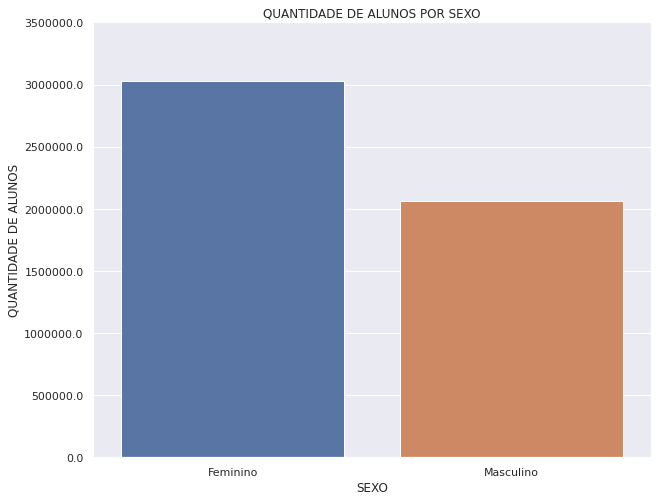

In [21]:
fig, ax = plt.subplots(figsize=(10, 8))
f = sns.barplot(x=['Feminino', 'Masculino'], y=[fem, masc])
plt.yticks(f.get_yticks(), f.get_yticks() * 1)
plt.title('QUANTIDADE DE ALUNOS POR SEXO')
plt.ylabel('QUANTIDADE DE ALUNOS')
plt.xlabel('SEXO')
plt.show()

- Quantidade de alunos de escola pública:
  - 1 -	Não Respondeu

  - 2 -	Pública

  - 3 -	Privada

  - 4	- Exterior

In [22]:
df_qtd_tipo_esc['TP_ESCOLA'].unique()

array([1, 3, 2])

In [23]:
mask = df_qtd_tipo_esc['TP_ESCOLA'] == 1
df_qtd_tipo_esc.loc[mask, 'TP_ESCOLA'] = 'Não Respondeu'

In [24]:
mask = df_qtd_tipo_esc['TP_ESCOLA'] == 2
df_qtd_tipo_esc.loc[mask, 'TP_ESCOLA'] = 'Pública'

In [25]:
mask = df_qtd_tipo_esc['TP_ESCOLA'] == 3
df_qtd_tipo_esc.loc[mask, 'TP_ESCOLA'] = 'Privada'

In [26]:
df_qtd_tipo_esc['TP_ESCOLA'].unique()

array(['Não Respondeu', 'Privada', 'Pública'], dtype=object)

In [27]:
df_qtd_tipo_esc['TP_ESCOLA'].value_counts()

Não Respondeu    3629376
Pública          1247262
Privada           218632
Name: TP_ESCOLA, dtype: int64

In [28]:
df_aux = pd.DataFrame(df_qtd_tipo_esc['TP_ESCOLA'].value_counts())

In [29]:
df_aux.reset_index(inplace=True)

In [30]:
df_aux

,index,TP_ESCOLA
0,Não Respondeu,3629376
1,Pública,1247262
2,Privada,218632


In [31]:
df_aux.rename(columns={'TP_ESCOLA': 'QUANTIDADE', 'index': 'TP_ESCOLA'}, inplace=True)

#### 4.7. Quantidade de alunos por tipos de escola (Tabela):

In [32]:
df_aux

,TP_ESCOLA,QUANTIDADE
0,Não Respondeu,3629376
1,Pública,1247262
2,Privada,218632


#### 4.8. Quantidade de alunos por tipos de escola (Gráfico):

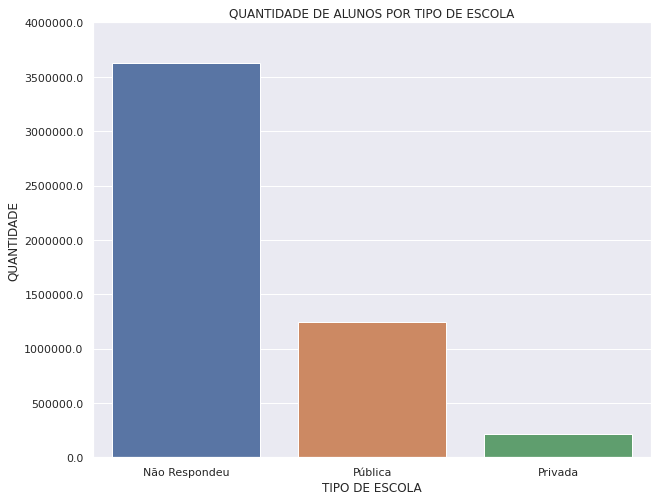

In [33]:
fig, ax = plt.subplots(figsize=(10, 8))
f = sns.barplot(data=df_aux, x='TP_ESCOLA', y='QUANTIDADE')
plt.yticks(f.get_yticks(), f.get_yticks() * 1)
plt.xlabel('TIPO DE ESCOLA')
plt.title('QUANTIDADE DE ALUNOS POR TIPO DE ESCOLA')
plt.show()

In [34]:
df_qtd_tipo_esc.head()

,NU_IDADE,TP_ESCOLA,TP_SEXO
0,21,Não Respondeu,M
1,16,Não Respondeu,F
2,18,Privada,F
3,23,Pública,M
4,23,Não Respondeu,M


In [35]:
df_aux_esc_s = pd.DataFrame(df_qtd_tipo_esc[['TP_ESCOLA', 'TP_SEXO']].value_counts())

In [36]:
df_aux_esc_s.reset_index(inplace=True)

In [37]:
df_aux_esc_s.rename(columns={0: 'Total'}, inplace=True)

#### 4.9. Quantidade de alunos por tipos de escola e sexo (Tabela):

In [38]:
df_aux_esc_s

,TP_ESCOLA,TP_SEXO,Total
0,Não Respondeu,F,2176591
1,Não Respondeu,M,1452785
2,Pública,F,738298
3,Pública,M,508964
4,Privada,F,116933
5,Privada,M,101699


In [39]:
mask_masc = df_aux_esc_s['TP_SEXO'] == 'M'

In [40]:
mask_fem = df_aux_esc_s['TP_SEXO'] == 'F'

In [41]:
df_aux_esc_s.loc[mask_masc, 'Total'].values

array([1452785,  508964,  101699])

In [42]:
df_aux_esc_s.loc[mask_fem, 'Total'].values

array([2176591,  738298,  116933])

In [43]:
df_aux_esc_s['TP_ESCOLA'].unique()

array(['Não Respondeu', 'Pública', 'Privada'], dtype=object)

####  4.10. Quantidade de alunos por tipos de escola e sexo (Gráfico):

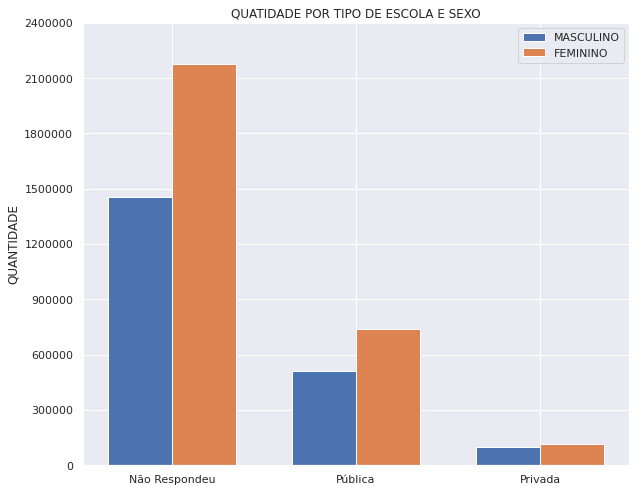

In [44]:
x = np.arange(3)
width = 0.35

fig, ax = plt.subplots(figsize=(9,7))
ax.bar(x - width/2, df_aux_esc_s.loc[mask_masc, 'Total'].values, width, label='MASCULINO')
ax.bar(x + width/2, df_aux_esc_s.loc[mask_fem, 'Total'].values, width, label='FEMININO')

ax.set_ylabel('QUANTIDADE')
ax.set_title('QUATIDADE POR TIPO DE ESCOLA E SEXO')
ax.set_xticks(x)
ax.set_xticklabels(df_aux_esc_s['TP_ESCOLA'].unique())
ax.set_yticks(np.arange(0, 2700000, 300000))
plt.yticks(ax.get_yticks(), ax.get_yticks() * 1)
ax.legend()

fig.tight_layout()
plt.show()

#### 4.11. Lendo mais dados do **Participante**:

- **SG_UF_RESIDENCIA** - Corresponde a Sigla da Unidade da Federação de residência
		
- **TP_COR_RACA** - Corresponde ao Cor/raça

- **TP_NACIONALIDADE** - Corresponde a Nacionalidade

- **TP_ST_CONCLUSAO** - Corresponde a	Situação de conclusão do Ensino Médio
		
- **TP_ANO_CONCLUIU**	- Corresponde a Ano de Conclusão do Ensino Médio

- **TP_ENSINO**  - Corresponde ao Tipo de instituição que concluiu ou concluirá o Ensino Médio 
	
- **IN_TREINEIRO** - Indica se o inscrito fez a prova com intuito de apenas treinar seus conhecimentos

In [45]:
cols = ['SG_UF_RESIDENCIA', 'TP_COR_RACA', 'TP_NACIONALIDADE',
        'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ENSINO',
        'IN_TREINEIRO']

tp_cor_raca = ['Não declarado', 'Branca', 'Preta',
               'Parda', 'Amarela', 'Indígena']

tp_nacionalidade = ['Não informado', 'Brasileiro(a)', 'Brasileiro(a) Naturalizado(a)',
                    'Estrangeiro(a)', 'Brasileiro(a) Nato(a), nascido(a) no exterior']

tp_st_conclusao = ['Já concluí o Ensino Médio', 'Estou cursando e concluirei o Ensino Médio em 2019',
                   'Estou cursando e concluirei o Ensino Médio após 2019',
                   'Não concluí e não estou cursando o Ensino Médio']

tp_ano_concluiu = ['Não informado', '2018', '2017', '2016', '2015', '2014', 
                   '2013', '2012', '2011', '2010', '2009', '2008', 
                   '2007', 'Antes de 2007']

In [46]:
df_dados_alunos = read_data_columns(path_microdados, columns=cols)

In [47]:
df_dados_alunos.head()

,SG_UF_RESIDENCIA,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ENSINO,IN_TREINEIRO
0,PA,3,4,1,3,NaN,0
1,PA,3,1,3,0,NaN,1
2,PA,1,1,2,0,1.0,0
3,PA,3,1,2,0,1.0,0
4,PA,3,1,1,5,1.0,0


In [48]:
df_dados_alunos['TP_ENSINO'].unique()

array([nan,  1.,  2.])

In [49]:
df_dados_alunos['SG_UF_RESIDENCIA'].unique()

array(['PA', 'TO', 'MA', 'MG', 'CE', 'AM', 'GO', 'RO', 'DF', 'SC', 'PR',
       'AP', 'PI', 'RJ', 'ES', 'RR', 'SP', 'RS', 'MT', 'AC', 'MS', 'BA',
       'PB', 'PE', 'RN', 'SE', 'AL'], dtype=object)

In [50]:
df_dados_alunos['TP_COR_RACA'].unique()

array([3, 1, 2, 0, 4, 5])

In [51]:
ser_cor_raca = df_dados_alunos['TP_COR_RACA'].value_counts().sort_index()

In [52]:
ser_cor_raca.index = tp_cor_raca

#### 4.12. Quantidade de alunos por cor/raça:

In [53]:
ser_cor_raca

Não declarado     103201
Branca           1831779
Preta             648309
Parda            2364063
Amarela           116162
Indígena           31756
Name: TP_COR_RACA, dtype: int64

In [54]:
def plot_series(sereis=pd.Series(), title='', yl='', 
                xl='', escala=[], fsize=(8,6), p_kind='bar', g_rot=90):
  f, ax = plt.subplots(figsize=fsize)
  sereis.plot(kind=p_kind)
  ax.set_yticks(escala)
  plt.yticks(ax.get_yticks(), ax.get_yticks() * 1)
  plt.title(title)
  plt.ylabel(yl)
  plt.xlabel(xl)
  plt.xticks(rotation=g_rot)
  plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


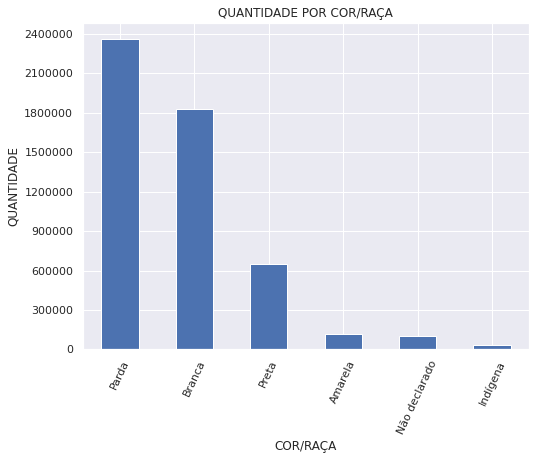

In [55]:
plot_series(ser_cor_raca.sort_values(ascending=False),
            'QUANTIDADE POR COR/RAÇA',
            'QUANTIDADE',
            'COR/RAÇA',
            np.arange(0, 2700000, 300000), g_rot=65)

#### 4.13. Quantidade de alunos por estado:

In [56]:
qtd_estado = df_dados_alunos['SG_UF_RESIDENCIA'].value_counts()
qtd_estado

SP    813772
MG    538896
BA    398095
RJ    338710
CE    295870
PA    281518
PE    271727
MA    219673
RS    218763
PR    210080
GO    170147
PB    147780
PI    121181
RN    119179
AM    118087
SC    109515
ES    102435
DF     94352
AL     91707
MT     88349
SE     75895
MS     70157
RO     58885
TO     47181
AP     42140
AC     38229
RR     12947
Name: SG_UF_RESIDENCIA, dtype: int64

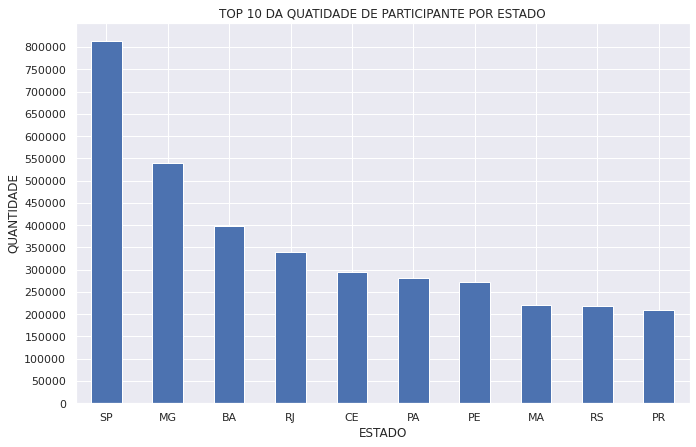

In [57]:
plot_series(qtd_estado[:10], 'TOP 10 DA QUATIDADE DE PARTICIPANTE POR ESTADO',
            'QUANTIDADE', 'ESTADO', 
            np.arange(0, 850000, 50000), fsize=(11, 7), g_rot=0)

In [58]:
# df_qtd_tipo_esc.loc[mask, 'TP_ESCOLA'] = 'Privada'
for i, val in enumerate(tp_cor_raca):
  mask = df_dados_alunos['TP_COR_RACA'] == i
  df_dados_alunos.loc[mask, 'TP_COR_RACA'] = val

In [59]:
df_dados_alunos.head()

,SG_UF_RESIDENCIA,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ENSINO,IN_TREINEIRO
0,PA,Parda,4,1,3,NaN,0
1,PA,Parda,1,3,0,NaN,1
2,PA,Branca,1,2,0,1.0,0
3,PA,Parda,1,2,0,1.0,0
4,PA,Parda,1,1,5,1.0,0


In [60]:
df_dados_alunos[['TP_COR_RACA','SG_UF_RESIDENCIA']].head()

,TP_COR_RACA,SG_UF_RESIDENCIA
0,Parda,PA
1,Parda,PA
2,Branca,PA
3,Parda,PA
4,Parda,PA


In [61]:
np.nan in df_dados_alunos['TP_COR_RACA']

False

In [62]:
df_dados_alunos['TP_COR_RACA'].value_counts()

Parda            2364063
Branca           1831779
Preta             648309
Amarela           116162
Não declarado     103201
Indígena           31756
Name: TP_COR_RACA, dtype: int64

In [63]:
df_uf_cor = pd.DataFrame(df_dados_alunos.groupby(by='SG_UF_RESIDENCIA')['TP_COR_RACA'].value_counts())

In [64]:
df_uf_cor.rename(columns={'TP_COR_RACA': 'QUANTIDADE'}, inplace=True)

In [65]:
df_dados_alunos['SG_UF_RESIDENCIA'].unique()

array(['PA', 'TO', 'MA', 'MG', 'CE', 'AM', 'GO', 'RO', 'DF', 'SC', 'PR',
       'AP', 'PI', 'RJ', 'ES', 'RR', 'SP', 'RS', 'MT', 'AC', 'MS', 'BA',
       'PB', 'PE', 'RN', 'SE', 'AL'], dtype=object)

In [66]:
df_uf_cor.reset_index(inplace=True)

In [67]:
df_uf_cor[['SG_UF_RESIDENCIA', 'TP_COR_RACA', 'QUANTIDADE']].loc[:5]

,SG_UF_RESIDENCIA,TP_COR_RACA,QUANTIDADE
0,AC,Parda,25941
1,AC,Branca,5811
2,AC,Preta,4246
3,AC,Amarela,1235
4,AC,Não declarado,697
5,AC,Indígena,299


#### 4.14. Quantidade de alunos por tipo de cor/raça (Tabela):

In [68]:
df_AC_cor = df_uf_cor.query('SG_UF_RESIDENCIA == "AC"')[['TP_COR_RACA', 'QUANTIDADE']]

In [69]:
df_AC_cor

,TP_COR_RACA,QUANTIDADE
0,Parda,25941
1,Branca,5811
2,Preta,4246
3,Amarela,1235
4,Não declarado,697
5,Indígena,299


#### 4.15. Quantidade de alunos por tipo de cor/raça (Gráfico):

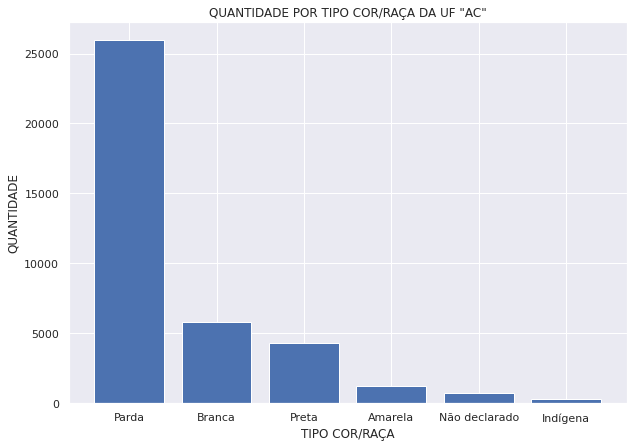

In [70]:
fig, ax = plt.subplots(figsize=(10,7))
ax.bar(x=df_AC_cor['TP_COR_RACA'], height=df_AC_cor['QUANTIDADE'], width=0.8)
plt.title('QUANTIDADE POR TIPO COR/RAÇA DA UF "AC"')
plt.ylabel('QUANTIDADE')
plt.xlabel('TIPO COR/RAÇA')
plt.show()

#### 4.16. Quantidade de alunos por tipo de cor/raça (Tabele):

  - Passo 1
    - Execute a célula abaixo.
  - Passo 2
    - Digite a UF do estado que deseja ver os dados

In [71]:
print(df_uf_cor['SG_UF_RESIDENCIA'].unique())
uf = str(input('Digite a sigla do estados desejado: ')).upper()
print(f'\n\tTABELA DO ESTADO {uf}\n')
df_uf_cor.query(f'SG_UF_RESIDENCIA == "{uf}"')[['TP_COR_RACA', 'QUANTIDADE']]

['AC' 'AL' 'AM' 'AP' 'BA' 'CE' 'DF' 'ES' 'GO' 'MA' 'MG' 'MS' 'MT' 'PA'
 'PB' 'PE' 'PI' 'PR' 'RJ' 'RN' 'RO' 'RR' 'RS' 'SC' 'SE' 'SP' 'TO']
Digite a sigla do estados desejado: PB

	TABELA DO ESTADO PB



,TP_COR_RACA,QUANTIDADE
84,Parda,83078
85,Branca,41693
86,Preta,13973
87,Amarela,4637
88,Não declarado,2897
89,Indígena,1502


#### 4.17. Quantidade de alunos por tipo de cor/raça (Gráfico):

  - Passo 1
    - Execute a célula abaixo.
  - Passo 2
    - Digite a UF do estado que deseja ver o gráfico com os dados

['AC' 'AL' 'AM' 'AP' 'BA' 'CE' 'DF' 'ES' 'GO' 'MA' 'MG' 'MS' 'MT' 'PA'
 'PB' 'PE' 'PI' 'PR' 'RJ' 'RN' 'RO' 'RR' 'RS' 'SC' 'SE' 'SP' 'TO']
Digite a sigla do estados desejado: PB




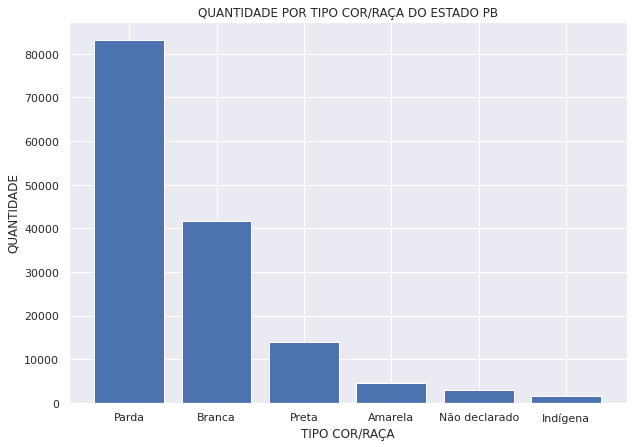

In [72]:
print(df_uf_cor['SG_UF_RESIDENCIA'].unique())
uf = str(input('Digite a sigla do estados desejado: ')).upper()

df_aux = df_uf_cor.query(f'SG_UF_RESIDENCIA == "{uf}"')[['TP_COR_RACA', 'QUANTIDADE']]
print('\n')
fig, ax = plt.subplots(figsize=(10,7))
ax.bar(x=df_aux['TP_COR_RACA'], height=df_aux['QUANTIDADE'], width=0.8)
plt.title(f'QUANTIDADE POR TIPO COR/RAÇA DO ESTADO {uf}')
plt.ylabel('QUANTIDADE')
plt.xlabel('TIPO COR/RAÇA')
plt.show()

In [73]:
df_dados_alunos.head()

,SG_UF_RESIDENCIA,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ENSINO,IN_TREINEIRO
0,PA,Parda,4,1,3,NaN,0
1,PA,Parda,1,3,0,NaN,1
2,PA,Branca,1,2,0,1.0,0
3,PA,Parda,1,2,0,1.0,0
4,PA,Parda,1,1,5,1.0,0


In [74]:
df_dados_alunos['TP_NACIONALIDADE'].unique()

array([4, 1, 2, 0, 3])

In [75]:
df_nacion = df_dados_alunos['TP_NACIONALIDADE'].value_counts().sort_index()

In [76]:
df_nacion.index = tp_nacionalidade

In [77]:
df_nacion = pd.DataFrame(df_nacion)
df_nacion.rename(columns={'TP_NACIONALIDADE': 'QUANTIDADE'}, inplace=True)

In [78]:
df_nacion.sort_values(by='QUANTIDADE', ascending=False, inplace=True)

#### 4.18. Quantidade de alunos por nacionalidade (Tabela):

In [79]:
df_nacion

,QUANTIDADE
Brasileiro(a),4950021
Brasileiro(a) Naturalizado(a),124332
"Brasileiro(a) Nato(a), nascido(a) no exterior",8233
Não informado,6749
Estrangeiro(a),5935


In [80]:
df_dados_alunos.head()

,SG_UF_RESIDENCIA,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ENSINO,IN_TREINEIRO
0,PA,Parda,4,1,3,NaN,0
1,PA,Parda,1,3,0,NaN,1
2,PA,Branca,1,2,0,1.0,0
3,PA,Parda,1,2,0,1.0,0
4,PA,Parda,1,1,5,1.0,0


In [81]:
df_dados_alunos['TP_ST_CONCLUSAO'].unique()

array([1, 3, 2, 4])

#### 4.19. Situação de conclusão do Ensino Médio (Tabela):

In [82]:
df_st_conc = pd.DataFrame(df_dados_alunos['TP_ST_CONCLUSAO'].value_counts())
df_st_conc.index = tp_st_conclusao
df_st_conc.rename(columns={'TP_ST_CONCLUSAO': 'QUANTIDADE'}, inplace=True)
df_st_conc

,QUANTIDADE
Já concluí o Ensino Médio,2992921
Estou cursando e concluirei o Ensino Médio em 2019,1465895
Estou cursando e concluirei o Ensino Médio após 2019,616668
Não concluí e não estou cursando o Ensino Médio,19786


#### 4.20. Ano de Conclusão do Ensino Médio (Tabela):

In [83]:
df_ano_concl = pd.DataFrame(df_dados_alunos['TP_ANO_CONCLUIU'].value_counts().sort_index())

In [84]:
df_ano_concl.index = tp_ano_concluiu
df_ano_concl.rename(columns={'TP_ANO_CONCLUIU': 'QUANTIDADE'}, inplace=True)

In [85]:
df_ano_concl

,QUANTIDADE
Não informado,2203392
2018,660960
2017,447324
2016,307227
2015,232860
2014,182887
2013,144797
2012,123774
2011,97015
2010,88481


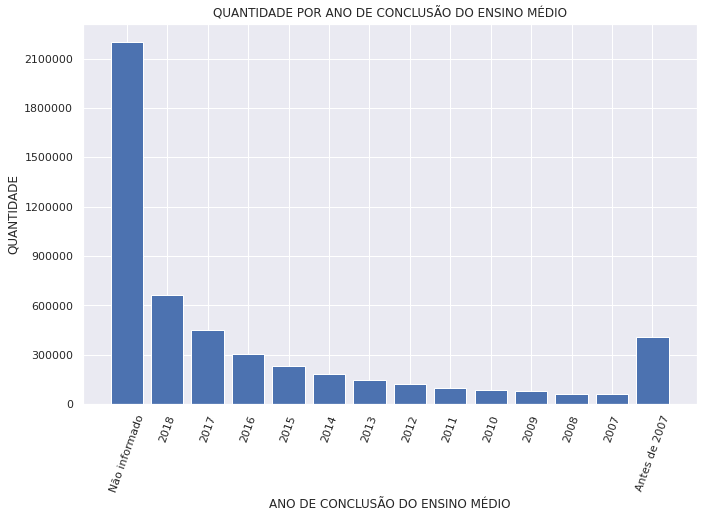

In [86]:
fig, ax = plt.subplots(figsize=(11, 7))
ax.bar(x=df_ano_concl.index, height=df_ano_concl['QUANTIDADE'])
plt.xticks(rotation=70)
ax.set_yticks(np.arange(0, 2300000, 300000))
plt.yticks(ax.get_yticks(), ax.get_yticks() * 1)
plt.title('QUANTIDADE POR ANO DE CONCLUSÃO DO ENSINO MÉDIO')
plt.ylabel('QUANTIDADE')
plt.xlabel('ANO DE CONCLUSÃO DO ENSINO MÉDIO')
plt.show()

In [87]:
df_dados_alunos.head()

,SG_UF_RESIDENCIA,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ENSINO,IN_TREINEIRO
0,PA,Parda,4,1,3,NaN,0
1,PA,Parda,1,3,0,NaN,1
2,PA,Branca,1,2,0,1.0,0
3,PA,Parda,1,2,0,1.0,0
4,PA,Parda,1,1,5,1.0,0


- Os valores **NaN** da coluna **TP_ENSINO** estou tratando eles como *TIPO DE ENSINO* não informado pelo participante.

In [88]:
df_dados_alunos['TP_ENSINO'].loc[df_dados_alunos['TP_ENSINO'].isna()] = 0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [89]:
tp_ensino = ['Não Informou', 
             'Ensino Regular', 
             'Educação Especial - Modalidade Substitutiva']

In [90]:
df_ensino = pd.DataFrame(df_dados_alunos['TP_ENSINO'].value_counts().sort_index())
df_ensino.rename(columns={'TP_ENSINO': 'QUANTIDADE'}, inplace=True)

#### 4.21. Tipo de instituição que concluiu ou concluirá o Ensino Médio (Tabela):

In [91]:
df_ensino.index = tp_ensino
df_ensino

,QUANTIDADE
Não Informou,2217073
Ensino Regular,2864398
Educação Especial - Modalidade Substitutiva,13799


#### 4.22. Quantidade de participantes que fizeram a prova com intuito de apenas treinar seus conhecimentos:

In [92]:
df_treino = pd.DataFrame(df_dados_alunos['IN_TREINEIRO'].value_counts())
df_treino.rename(columns={'IN_TREINEIRO': 'QUANTIDADE'}, inplace=True)
df_treino.index = ['Não', 'Sim']
df_treino

,QUANTIDADE
Não,4478602
Sim,616668


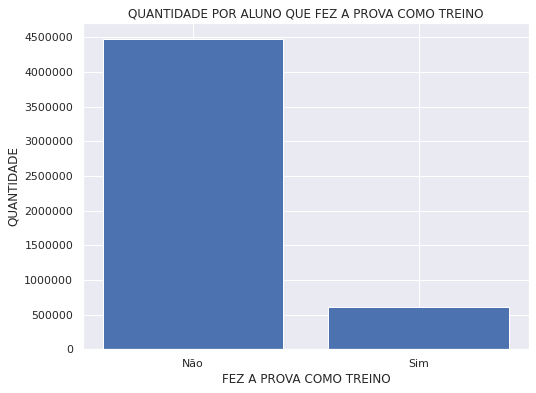

In [93]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(x=df_treino.index, height=df_treino['QUANTIDADE'])
ax.set_yticks(np.arange(0, 4800000, 500000))
plt.yticks(ax.get_yticks(), ax.get_yticks() * 1)
plt.title('QUANTIDADE POR ALUNO QUE FEZ A PROVA COMO TREINO')
plt.ylabel('QUANTIDADE')
plt.xlabel('FEZ A PROVA COMO TREINO')
plt.show()

#### 4.23. Lendo dados da **Prova Objetiva do Participante**:


- **NU_NOTA_CN** - Nota da prova de Ciências da Natureza

- **NU_NOTA_CH** - Nota da prova de Ciências Humanas

- **NU_NOTA_LC** - Nota da prova de Linguagens e Códigos

- **NU_NOTA_MT** - Nota da prova de Matemática

In [94]:
col = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO',
       'TP_ESCOLA', 'TP_COR_RACA', 'TP_SEXO', 'SG_UF_RESIDENCIA']

In [95]:
df_prova_obj = read_data_columns(path_microdados, columns=col)

In [96]:
df_prova_obj.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_ESCOLA,TP_COR_RACA,TP_SEXO,SG_UF_RESIDENCIA
0,472.9,466.0,497.3,369.1,780.0,1,3,M,PA
1,358.9,495.4,482.3,416.5,600.0,1,3,F,PA
2,574.2,538.7,582.6,571.5,640.0,3,1,F,PA
3,NaN,NaN,NaN,NaN,NaN,2,3,M,PA
4,NaN,NaN,NaN,NaN,NaN,1,3,M,PA


In [97]:
df_prova_obj.isnull().sum()

NU_NOTA_CN          1384837
NU_NOTA_CH          1172125
NU_NOTA_LC          1172125
NU_NOTA_MT          1384837
NU_NOTA_REDACAO     1172126
TP_ESCOLA                 0
TP_COR_RACA               0
TP_SEXO                   0
SG_UF_RESIDENCIA          0
dtype: int64

In [98]:
df_prova_obj['NU_NOTA_TOTAL'] = df_prova_obj.iloc[:, :5].sum(axis=1).values / 5

In [99]:
df_prova_obj.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_ESCOLA,TP_COR_RACA,TP_SEXO,SG_UF_RESIDENCIA,NU_NOTA_TOTAL
0,472.9,466.0,497.3,369.1,780.0,1,3,M,PA,517.06
1,358.9,495.4,482.3,416.5,600.0,1,3,F,PA,470.62
2,574.2,538.7,582.6,571.5,640.0,3,1,F,PA,581.40
3,NaN,NaN,NaN,NaN,NaN,2,3,M,PA,0.00
4,NaN,NaN,NaN,NaN,NaN,1,3,M,PA,0.00


#### 4.24. Nota Total máxima:

In [100]:
n = df_prova_obj['NU_NOTA_TOTAL'].max()
print(f'Nota máxima: {n:.2f}')

Nota máxima: 850.82


#### 4.25. Distribuição das notas por quantidade de participates (Gráficos):

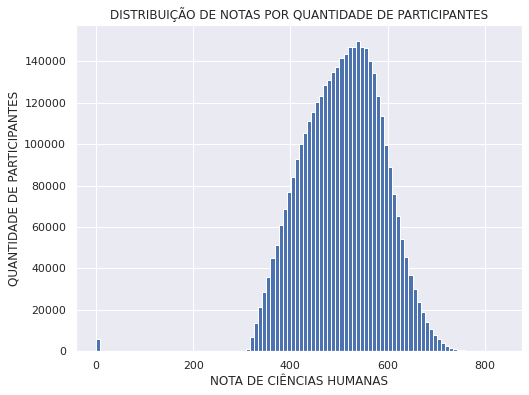

In [101]:
plt.subplots(figsize=(8, 6))
df_prova_obj['NU_NOTA_CH'].hist(bins=100)
plt.title('DISTRIBUIÇÃO DE NOTAS POR QUANTIDADE DE PARTICIPANTES')
plt.xlabel('NOTA DE CIÊNCIAS HUMANAS')
plt.ylabel('QUANTIDADE DE PARTICIPANTES')
plt.show()

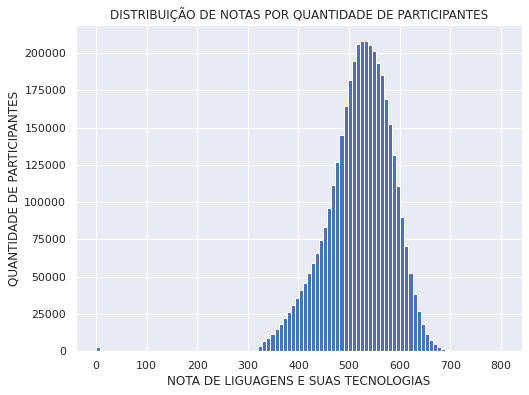

In [102]:
plt.subplots(figsize=(8, 6))
df_prova_obj['NU_NOTA_LC'].hist(bins=100)
plt.title('DISTRIBUIÇÃO DE NOTAS POR QUANTIDADE DE PARTICIPANTES')
plt.xlabel('NOTA DE LIGUAGENS E SUAS TECNOLOGIAS')
plt.ylabel('QUANTIDADE DE PARTICIPANTES')
plt.show()

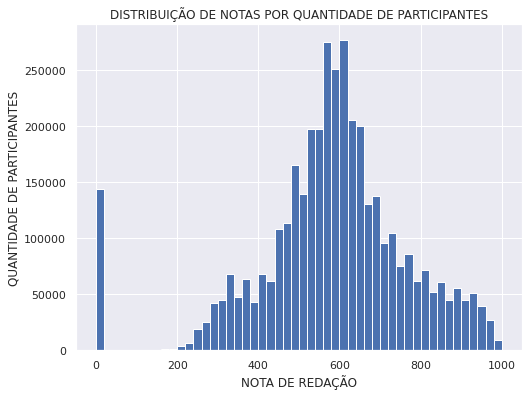

In [103]:
plt.subplots(figsize=(8, 6))
df_prova_obj['NU_NOTA_REDACAO'].hist(bins=50)
plt.title('DISTRIBUIÇÃO DE NOTAS POR QUANTIDADE DE PARTICIPANTES')
plt.xlabel('NOTA DE REDAÇÃO')
plt.ylabel('QUANTIDADE DE PARTICIPANTES')
plt.show()

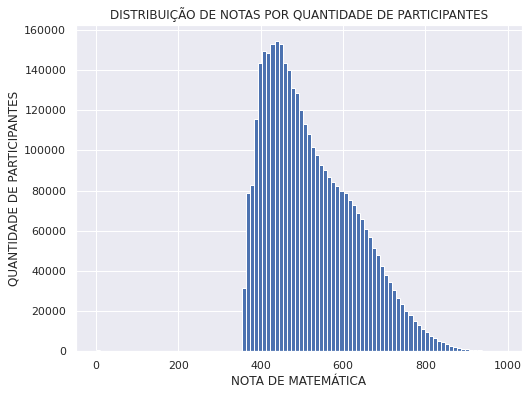

In [104]:
plt.subplots(figsize=(8, 6))
df_prova_obj['NU_NOTA_MT'].hist(bins=100)
plt.title('DISTRIBUIÇÃO DE NOTAS POR QUANTIDADE DE PARTICIPANTES')
plt.xlabel('NOTA DE MATEMÁTICA')
plt.ylabel('QUANTIDADE DE PARTICIPANTES')
plt.show()

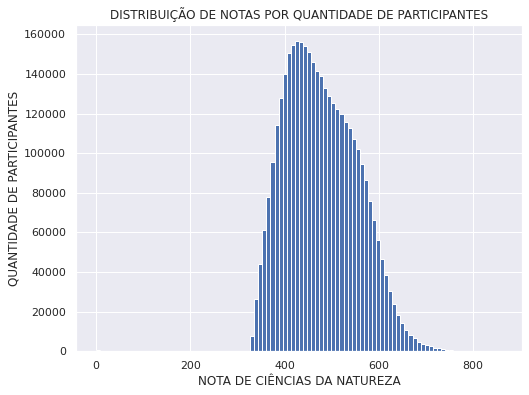

In [105]:
plt.subplots(figsize=(8, 6))
df_prova_obj['NU_NOTA_CN'].hist(bins=100)
plt.title('DISTRIBUIÇÃO DE NOTAS POR QUANTIDADE DE PARTICIPANTES')
plt.xlabel('NOTA DE CIÊNCIAS DA NATUREZA')
plt.ylabel('QUANTIDADE DE PARTICIPANTES')
plt.show()

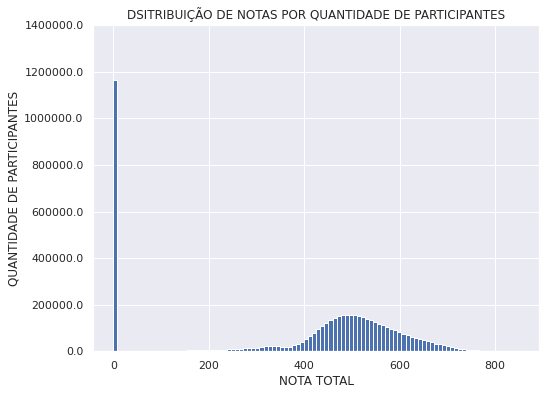

In [106]:
plt.subplots(figsize=(8, 6))
f = df_prova_obj['NU_NOTA_TOTAL'].hist(bins=100)
plt.yticks(f.get_yticks(), f.get_yticks() * 1)
plt.title('DSITRIBUIÇÃO DE NOTAS POR QUANTIDADE DE PARTICIPANTES')
plt.xlabel('NOTA TOTAL')
plt.ylabel('QUANTIDADE DE PARTICIPANTES')
plt.show()

In [107]:
mask = df_prova_obj['NU_NOTA_TOTAL'] == df_prova_obj[df_prova_obj['SG_UF_RESIDENCIA'] == 'PB']['NU_NOTA_TOTAL'].max()

In [108]:
df_prova_obj.loc[mask]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_ESCOLA,TP_COR_RACA,TP_SEXO,SG_UF_RESIDENCIA,NU_NOTA_TOTAL
1781252,758.0,771.8,727.5,922.5,920.0,3,3,M,PB,819.96


In [109]:
df_masc = df_prova_obj.query('TP_SEXO == "M"')
df_masc.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_ESCOLA,TP_COR_RACA,TP_SEXO,SG_UF_RESIDENCIA,NU_NOTA_TOTAL
0,472.9,466.0,497.3,369.1,780.0,1,3,M,PA,517.06
3,NaN,NaN,NaN,NaN,NaN,2,3,M,PA,0.00
4,NaN,NaN,NaN,NaN,NaN,1,3,M,PA,0.00
5,522.0,592.6,582.0,605.3,580.0,1,1,M,PA,576.38
8,370.7,386.4,354.2,375.5,460.0,1,3,M,PA,389.36


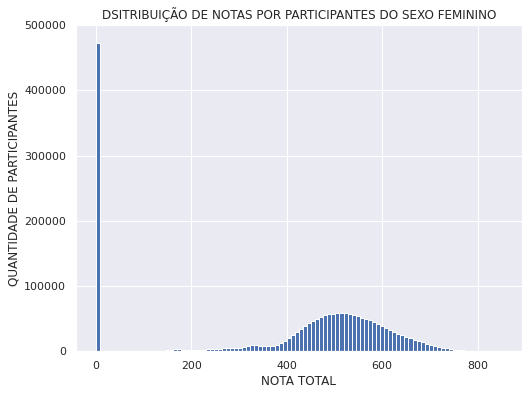

In [110]:
plt.subplots(figsize=(8, 6))
df_masc['NU_NOTA_TOTAL'].hist(bins=100)
plt.yticks(np.arange(0, 600000, 100000))
plt.title('DSITRIBUIÇÃO DE NOTAS POR PARTICIPANTES DO SEXO FEMININO')
plt.xlabel('NOTA TOTAL')
plt.ylabel('QUANTIDADE DE PARTICIPANTES')
plt.show()

In [111]:
df_fem = df_prova_obj.query('TP_SEXO == "F"')
df_fem.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_ESCOLA,TP_COR_RACA,TP_SEXO,SG_UF_RESIDENCIA,NU_NOTA_TOTAL
1,358.9,495.4,482.3,416.5,600.0,1,3,F,PA,470.62
2,574.2,538.7,582.6,571.5,640.0,3,1,F,PA,581.40
6,407.4,480.1,464.3,581.5,360.0,1,3,F,PA,458.66
7,369.7,398.2,395.6,473.8,480.0,2,3,F,PA,423.46
9,443.5,432.4,515.3,397.0,540.0,1,2,F,PA,465.64


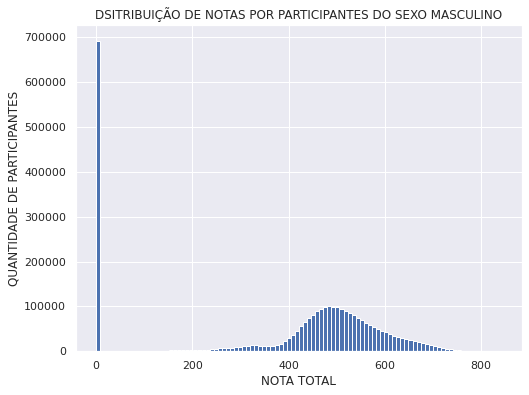

In [113]:
plt.subplots(figsize=(8, 6))
df_fem['NU_NOTA_TOTAL'].hist(bins=100)
plt.title('DSITRIBUIÇÃO DE NOTAS POR PARTICIPANTES DO SEXO MASCULINO')
plt.xlabel('NOTA TOTAL')
plt.ylabel('QUANTIDADE DE PARTICIPANTES')
plt.show()

#### 4.26. Lendo mais dados do **Participante**:

**Q001**	Até que série seu pai, ou o homem responsável por você, estudou?
  - **A**	Nunca estudou.
  - **B**	Não completou a 4ª série/5º ano do Ensino Fundamental.
  - **C**	Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino  Fundamental.
  - **D**	Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.
  - **E**	Completou o Ensino Médio, mas não completou a Faculdade.
  - **F**	Completou a Faculdade, mas não completou a Pós-graduação.
  - **G**	Completou a Pós-graduação.
  - **H**	Não sei.

**Q002**	Até que série sua mãe, ou a mulher responsável por você, estudou?
  - **A**	Nunca estudou.
  - **B**	Não completou a 4ª série/5º ano do Ensino Fundamental.
  - **C**	Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.
  - **D**	Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.
  - **E**	Completou o Ensino Médio, mas não completou a Faculdade.
  - **F**	Completou a Faculdade, mas não completou a Pós-graduação.
  - **G**	Completou a Pós-graduação.
  - **H**	Não sei.
	
**Q003**	A partir da apresentação de algumas ocupações divididas em grupos ordenados, indique o grupo que contempla a ocupação mais próxima da ocupação do seu pai ou do homem responsável por você. (Se ele não estiver trabalhando, escolha uma ocupação pensando no último trabalho dele).
  - **A**	Grupo 1: Lavrador, agricultor sem empregados, bóia fria, criador de animais (gado, porcos, galinhas, ovelhas, cavalos etc.), apicultor, pescador, lenhador, seringueiro, extrativista.
  - **B**	Grupo 2: Diarista, empregado doméstico, cuidador de idosos, babá, cozinheiro (em casas particulares), motorista particular, jardineiro, faxineiro de empresas e prédios, vigilante, porteiro, carteiro, office-boy, vendedor, caixa, atendente de loja, auxiliar administrativo, recepcionista, servente de pedreiro, repositor de mercadoria.
  - **C**	Grupo 3: Padeiro, cozinheiro industrial ou em restaurantes, sapateiro, costureiro, joalheiro, torneiro mecânico, operador de máquinas, soldador, operário de fábrica, trabalhador da mineração, pedreiro, pintor, eletricista, encanador, motorista, caminhoneiro, taxista.
  - **D**	Grupo 4: Professor (de ensino fundamental ou médio, idioma, música, artes etc.), técnico (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretor de imóveis, supervisor, gerente, mestre de obras, pastor, microempresário (proprietário de empresa com menos de 10 empregados), pequeno comerciante, pequeno proprietário de terras, trabalhador autônomo ou por conta própria.
  - **E**	Grupo 5: Médico, engenheiro, dentista, psicólogo, economista, advogado, juiz, promotor, defensor, delegado, tenente, capitão, coronel, professor universitário, diretor em empresas públicas ou privadas, político, proprietário de empresas com mais de 10 empregados.
- **F**	Não sei.

**Q004**	A partir da apresentação de algumas ocupações divididas em grupos ordenados, indique o grupo que contempla a ocupação mais próxima da ocupação da sua mãe ou da mulher responsável por você. (Se ela não estiver trabalhando, escolha uma ocupação pensando no último trabalho dela).
- **A**	Grupo 1: Lavradora, agricultora sem empregados, bóia fria, criadora de animais (gado, porcos, galinhas, ovelhas, cavalos etc.), apicultora, pescadora, lenhadora, seringueira, extrativista.
- **B**	Grupo 2: Diarista, empregada doméstica, cuidadora de idosos, babá, cozinheira (em casas particulares), motorista particular, jardineira, faxineira de empresas e prédios, vigilante, porteira, carteira, office-boy, vendedora, caixa, atendente de loja, auxiliar administrativa, recepcionista, servente de pedreiro, repositora de mercadoria.
- **C**	Grupo 3: Padeira, cozinheira industrial ou em restaurantes, sapateira, costureira, joalheira, torneira mecânica, operadora de máquinas, soldadora, operária de fábrica, trabalhadora da mineração, pedreira, pintora, eletricista, encanadora, motorista, caminhoneira, taxista.
- **D**	Grupo 4: Professora (de ensino fundamental ou médio, idioma, música, artes etc.), técnica (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretora de imóveis, supervisora, gerente, mestre de obras, pastora, microempresária (proprietária de empresa com menos de 10 empregados), pequena comerciante, pequena proprietária de terras, trabalhadora autônoma ou por conta própria.
- **E**	Grupo 5: Médica, engenheira, dentista, psicóloga, economista, advogada, juíza, promotora, defensora, delegada, tenente, capitã, coronel, professora universitária, diretora em empresas públicas ou privadas, política, proprietária de empresas com mais de 10 empregados.
- **F**	Não sei.
	
**Q005**	Incluindo você, quantas pessoas moram atualmente em sua residência?
- **1**	1, pois moro sozinho(a).
- **2**	2
- **3**	3
- **4**	4
- **5**	5
- **6**	6
- **7**	7
- **8**	8
- **9**	9
- **10**	10
- **11**	11
- **12**	12
- **13**	13
- **14**	14
- **15**	15
- **16**	16
- **17**	17
- **18**	18
- **19**	19
- **20**	20

**Q006**	Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)

- **A**	Nenhuma renda.

- **B**	Até R$ 998,00.

- **C**	De R$ 998,01 até R$ 1.497,00.

- **D**	De R$ 1.497,01 até R$ 1.996,00.

- **E**	De R$ 1.996,01 até R$ 2.495,00.

- **F**	De R$ 2.495,01 até R$ 2.994,00.

- **G**	De R$ 2.994,01 até R$ 3.992,00.

- **H**	De R$ 3.992,01 até R$ 4.990,00.

- **I**	De R$ 4.990,01 até R$ 5.988,00.

- **J**	De R$ 5.988,01 até R$ 6.986,00.

- **K**	De R$ 6.986,01 até R$ 7.984,00.

- **L**	De R$ 7.984,01 até R$ 8.982,00.

- **M**	De R$ 8.982,01 até R$ 9.980,00.

- **N**	De R$ 9.980,01 até R$ 11.976,00.

- **O**	De R$ 11.976,01 até R$ 14.970,00.

- **P**	De R$ 14.970,01 até R$ 19.960,00.

- **Q**	Mais de R$ 19.960,00.
	

**Q007**	Em sua residência trabalha empregado(a) doméstico(a)?

- **A**	Não.
- **B**	Sim, um ou dois dias por semana.
- **C**	Sim, três ou quatro dias por semana.
- **D**	Sim, pelo menos cinco dias por semana.

**Q008**	Na sua residência tem banheiro?
- **A**	Não.
- **B**	Sim, um.
- **C**	Sim, dois.
- **D**	Sim, três.
- **E**	Sim, quatro ou mais.
	
**Q009**	Na sua residência tem quartos para dormir?
- **A**	Não.
- **B**	Sim, um.
- **C**	Sim, dois.
- **D**	Sim, três.
- **E**	Sim, quatro ou mais.
	
**Q010**	Na sua residência tem carro?
- **A**	Não.
- **B**	Sim, um.
- **C**	Sim, dois.
- **D**	Sim, três.
- **E**	Sim, quatro ou mais.
	
**Q011**	Na sua residência tem motocicleta?
- **A**	Não.
- **B**	Sim, uma.
- **C**	Sim, duas.
- **D**	Sim, três.
- **E**	Sim, quatro ou mais.

**Q012**	Na sua residência tem geladeira?
- **A**	Não.
- **B**	Sim, uma.
- **C**	Sim, duas.
- **D**	Sim, três.
- **E**	Sim, quatro ou mais.

**Q013**	Na sua residência tem freezer (independente ou segunda porta da geladeira?
- **A**	Não.
- **B**	Sim, um.
- **C**	Sim, dois.
- **D**	Sim, três.
- **E**	Sim, quatro ou mais.

**Q014**	Na sua residência tem máquina de lavar roupa? (o tanquinho NÃO deve ser considerado)
- **A**	Não.
- **B**	Sim, um.
- **C**	Sim, dois.
- **D**	Sim, três.
- **E**	Sim, quatro ou mais.

**Q015**	Na sua residência tem máquina de secar roupa (independente ou em conjunto com a máquina de lavar roupa)?
- **A**	Não.
- **B**	Sim, um.
- **C**	Sim, dois.
- **D**	Sim, três.
- **E**	Sim, quatro ou mais.

**Q016**	Na sua residência tem forno micro-ondas?
- **A**	Não.
- **B**	Sim, um.
- **C**	Sim, dois.
- **D**	Sim, três.
- **E**	Sim, quatro ou mais.

**Q017**	Na sua residência tem máquina de lavar louça?
- **A**	Não.
- **B**	Sim, um.
- **C**	Sim, dois.
- **D**	Sim, três.
- **E**	Sim, quatro ou mais.

**Q018**	Na sua residência tem aspirador de pó?
- **A**	Não.
- **B**	Sim.

**Q019**	Na sua residência tem televisão em cores?
- **A**	Não.
- **B**	Sim, um.
- **C**	Sim, dois.
- **D**	Sim, três.
- **E**	Sim, quatro ou mais.
	
**Q020**	Na sua residência tem aparelho de DVD?
- **A**	Não.
- **B**	Sim.
	
**Q021**	Na sua residência tem TV por assinatura?
- **A**	Não.
- **B**	Sim.
	
**Q022**	Na sua residência tem telefone celular?
- **A**	Não.
- **B**	Sim, um.
- **C**	Sim, dois.
- **D**	Sim, três.
- **E**	Sim, quatro ou mais.

**Q023**	Na sua residência tem telefone fixo?
- **A**	Não.
- **B**	Sim.
	
**Q024**	Na sua residência tem computador?
- **A**	Não.
- **B**	Sim, um.
- **C**	Sim, dois.
- **D**	Sim, três.
- **E**	Sim, quatro ou mais.
		
**Q025**	Na sua residência tem acesso à Internet?
- **A**	Não.
- **B**	Sim.
	

In [118]:
df_quest_socioec = read_data_columns(path_microdados, columns=questoes)

In [119]:
df_quest_socioec.head()

,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,D,E,A,A,7,B,A,B,C,A,A,B,A,B,A,A,A,A,C,B,A,D,A,B,A
1,D,E,A,A,5,B,A,B,C,A,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A
2,H,E,A,D,3,C,D,E,E,C,A,B,C,B,A,B,A,A,D,B,B,D,A,C,B
3,D,D,A,B,3,C,A,B,C,A,A,B,A,A,A,A,A,A,C,A,A,D,A,A,A
4,B,C,A,A,5,C,A,C,B,A,B,B,A,B,A,A,A,A,B,A,A,D,A,A,A


#### 2.27. Dados do questionário socioeconômicas do participante:

In [219]:
def plot_quest(df, col, titulo, xlab, ylab, figSize=(10,8)):
  fig, ax = plt.subplots(figsize=figSize)
  x=df[col].value_counts().index
  y=df[col].value_counts().values
  sns.barplot(x=x, y=y)
  plt.title(titulo)
  plt.yticks(ax.get_yticks(), ax.get_yticks() * 1)
  plt.xlabel(xlab)
  plt.ylabel(ylab)
  plt.show()

##### **Q001**	Até que série seu pai, ou o homem responsável por você, estudou?
  - **A**	Nunca estudou.
  - **B**	Não completou a 4ª série/5º ano do Ensino Fundamental.
  - **C**	Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino  Fundamental.
  - **D**	Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.
  - **E**	Completou o Ensino Médio, mas não completou a Faculdade.
  - **F**	Completou a Faculdade, mas não completou a Pós-graduação.
  - **G**	Completou a Pós-graduação.
  - **H**	Não sei.

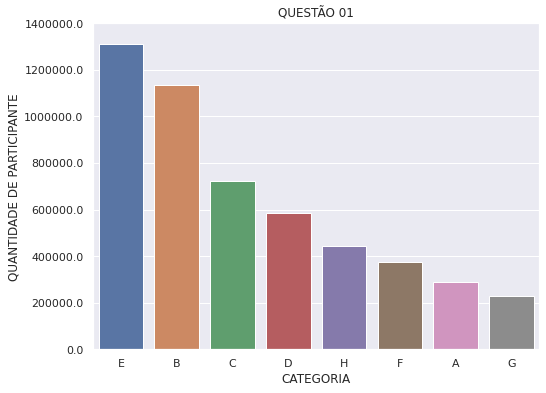

In [220]:
plot_quest(df_quest_socioec, 'Q001', 'QUESTÃO 01', 
           'CATEGORIA', 'QUANTIDADE DE PARTICIPANTE', figSize=(8,6))

##### **Q002** Até que série sua mãe, ou a mulher responsável por você, estudou?
- **A** Nunca estudou.
- **B** Não completou a 4ª série/5º ano do Ensino Fundamental.
- **C** Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.
- **D** Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.
- **E** Completou o Ensino Médio, mas não completou a Faculdade.
- **F** Completou a Faculdade, mas não completou a Pós-graduação.
- **G** Completou a Pós-graduação.
- **H** Não sei.

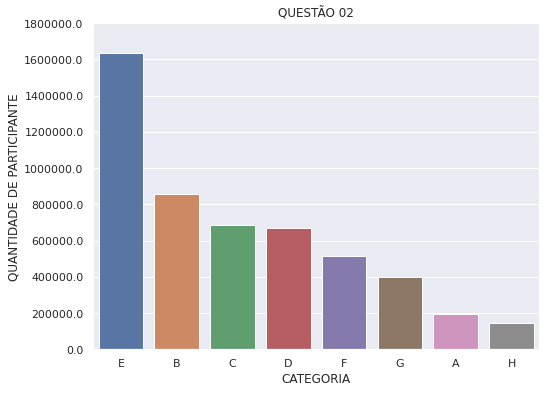

In [146]:
plot_quest(df_quest_socioec, 'Q002', 'QUESTÃO 02', 
           'CATEGORIA', 'QUANTIDADE DE PARTICIPANTE', figSize=(8,6))

##### **Q003** A partir da apresentação de algumas ocupações divididas em grupos ordenados, indique o grupo que contempla a ocupação mais próxima da ocupação do seu pai ou do homem responsável por você. (Se ele não estiver trabalhando, escolha uma ocupação pensando no último trabalho dele).
- **A** Grupo 1: Lavrador, agricultor sem empregados, bóia fria, criador de animais (gado, porcos, galinhas, ovelhas, cavalos etc.), apicultor, pescador, lenhador, seringueiro, extrativista.
- **B** Grupo 2: Diarista, empregado doméstico, cuidador de idosos, babá, cozinheiro (em casas particulares), motorista particular, jardineiro, faxineiro de empresas e prédios, vigilante, porteiro, carteiro, office-boy, vendedor, caixa, atendente de loja, auxiliar administrativo, recepcionista, servente de pedreiro, repositor de mercadoria.
- **C** Grupo 3: Padeiro, cozinheiro industrial ou em restaurantes, sapateiro, costureiro, joalheiro, torneiro mecânico, operador de máquinas, soldador, operário de fábrica, trabalhador da mineração, pedreiro, pintor, eletricista, encanador, motorista, caminhoneiro, taxista.
- **D** Grupo 4: Professor (de ensino fundamental ou médio, idioma, música, artes etc.), técnico (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretor de imóveis, supervisor, gerente, mestre de obras, pastor, microempresário (proprietário de empresa com menos de 10 empregados), pequeno comerciante, pequeno proprietário de terras, trabalhador autônomo ou por conta própria.
- **E** Grupo 5: Médico, engenheiro, dentista, psicólogo, economista, advogado, juiz, promotor, defensor, delegado, tenente, capitão, coronel, professor universitário, diretor em empresas públicas ou privadas, político, proprietário de empresas com mais de 10 empregados.
- **F** Não sei.

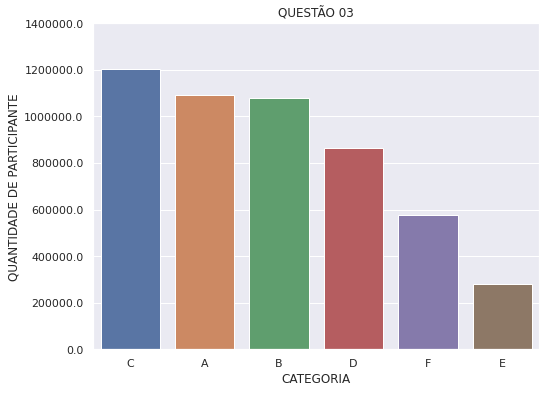

In [147]:
plot_quest(df_quest_socioec, 'Q003', 'QUESTÃO 03', 
           'CATEGORIA', 'QUANTIDADE DE PARTICIPANTE', figSize=(8,6))

##### **Q004** A partir da apresentação de algumas ocupações divididas em grupos ordenados, indique o grupo que contempla a ocupação mais próxima da ocupação da sua mãe ou da mulher responsável por você. (Se ela não estiver trabalhando, escolha uma ocupação pensando no último trabalho dela).
- **A** Grupo 1: Lavradora, agricultora sem empregados, bóia fria, criadora de animais (gado, porcos, galinhas, ovelhas, cavalos etc.), apicultora, pescadora, lenhadora, seringueira, extrativista.
- **B** Grupo 2: Diarista, empregada doméstica, cuidadora de idosos, babá, cozinheira (em casas particulares), motorista particular, jardineira, faxineira de empresas e prédios, vigilante, porteira, carteira, office-boy, vendedora, caixa, atendente de loja, auxiliar administrativa, recepcionista, servente de pedreiro, repositora de mercadoria.
- **C** Grupo 3: Padeira, cozinheira industrial ou em restaurantes, sapateira, costureira, joalheira, torneira mecânica, operadora de máquinas, soldadora, operária de fábrica, trabalhadora da mineração, pedreira, pintora, eletricista, encanadora, motorista, caminhoneira, taxista.

- **D** Grupo 4: Professora (de ensino fundamental ou médio, idioma, música, artes etc.), técnica (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretora de imóveis, supervisora, gerente, mestre de obras, pastora, microempresária (proprietária de empresa com menos de 10 empregados), pequena comerciante, pequena proprietária de terras, trabalhadora autônoma ou por conta própria.

- **E** Grupo 5: Médica, engenheira, dentista, psicóloga, economista, advogada, juíza, promotora, defensora, delegada, tenente, capitã, coronel, professora universitária, diretora em empresas públicas ou privadas, política, proprietária de empresas com mais de 10 empregados.

- **F** Não sei.

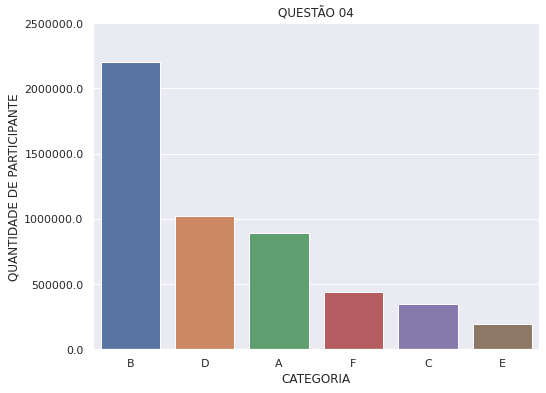

In [148]:
plot_quest(df_quest_socioec, 'Q004', 'QUESTÃO 04', 
           'CATEGORIA', 'QUANTIDADE DE PARTICIPANTE', figSize=(8,6))

##### **Q005** Incluindo você, quantas pessoas moram atualmente em sua residência?
- **1** 1, pois moro sozinho(a).
- **2** 2
- **3** 3
- **4** 4
- **5** 5
- **6** 6
- **7** 7
- **8** 8
- **9** 9
- **10** 10
- **11** 11
- **12** 12
- **13** 13
- **14** 14
- **15** 15
- **16** 16
- **17** 17
- **18** 18
- **19** 19
- **20** 20

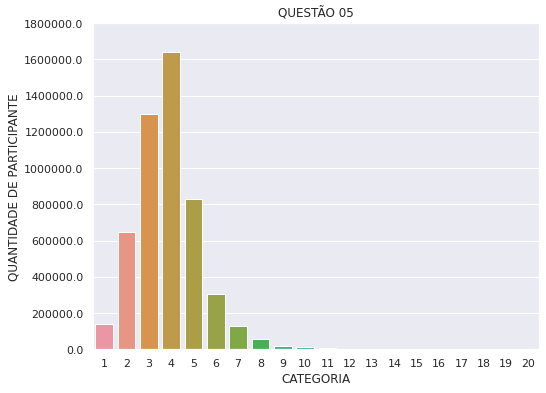

In [149]:
plot_quest(df_quest_socioec, 'Q005', 'QUESTÃO 05', 
           'CATEGORIA', 'QUANTIDADE DE PARTICIPANTE', figSize=(8,6))

##### **Q006** Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)

- **A** Nenhuma renda.

- **B** Até R$ 998,00.

- **C** De R$ 998,01 até R$ 1.497,00.

- **D** De R$ 1.497,01 até R$ 1.996,00.

- **E** De R$ 1.996,01 até R$ 2.495,00.

- **F** De R$ 2.495,01 até R$ 2.994,00.

- **G** De R$ 2.994,01 até R$ 3.992,00.

- **H** De R$ 3.992,01 até R$ 4.990,00.

- **I** De R$ 4.990,01 até R$ 5.988,00.

- **J** De R$ 5.988,01 até R$ 6.986,00.

- **K** De R$ 6.986,01 até R$ 7.984,00.

- **L** De R$ 7.984,01 até R$ 8.982,00.

- **M** De R$ 8.982,01 até R$ 9.980,00.

- **N** De R$ 9.980,01 até R$ 11.976,00.

- **O** De R$ 11.976,01 até R$ 14.970,00.

- **P** De R$ 14.970,01 até R$ 19.960,00.

- **Q** Mais de R$ 19.960,00.


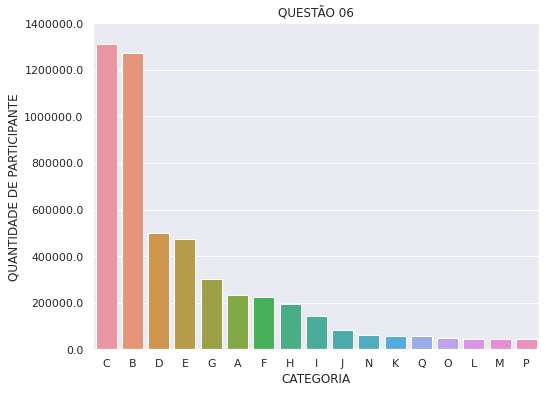

In [150]:
plot_quest(df_quest_socioec, 'Q006', 'QUESTÃO 06', 
           'CATEGORIA', 'QUANTIDADE DE PARTICIPANTE', figSize=(8,6))

##### **Q007** Em sua residência trabalha empregado(a) doméstico(a)?

- **A** Não.
- **B** Sim, um ou dois dias por semana.
- **C** Sim, três ou quatro dias por semana.
- **D** Sim, pelo menos cinco dias por semana.

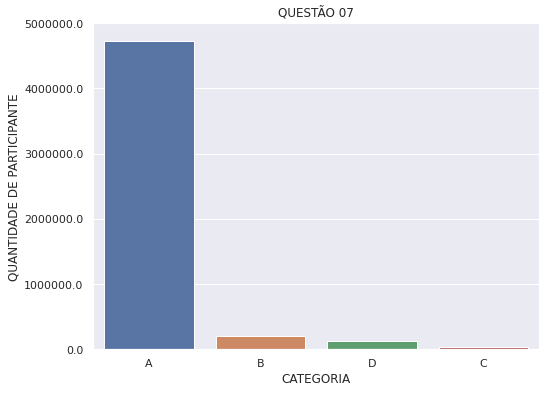

In [221]:
plot_quest(df_quest_socioec, 'Q007', 'QUESTÃO 07', 
           'CATEGORIA', 'QUANTIDADE DE PARTICIPANTE', figSize=(8,6))

##### **Q008** Na sua residência tem banheiro?
- **A** Não.
- **B** Sim, um.
- **C** Sim, dois.
- **D** Sim, três.
- **E** Sim, quatro ou mais.

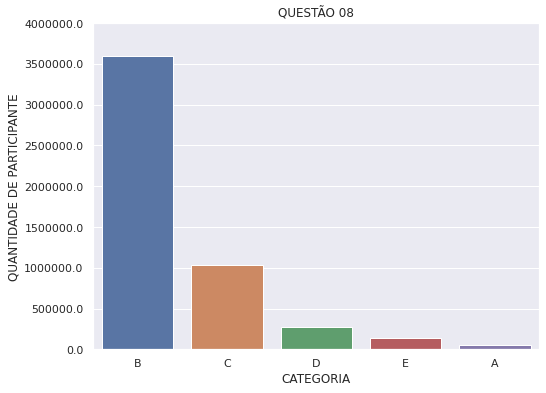

In [222]:
plot_quest(df_quest_socioec, 'Q008', 'QUESTÃO 08', 
           'CATEGORIA', 'QUANTIDADE DE PARTICIPANTE', figSize=(8,6))

##### **Q009** Na sua residência tem quartos para dormir?
- **A** Não.
- **B** Sim, um.
- **C** Sim, dois.
- **D** Sim, três.
- **E** Sim, quatro ou mais.

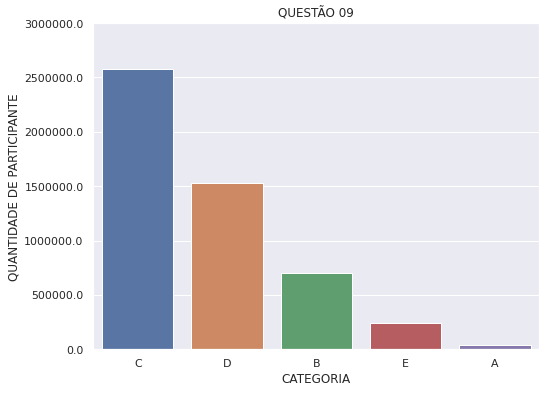

In [223]:
plot_quest(df_quest_socioec, 'Q009', 'QUESTÃO 09', 
           'CATEGORIA', 'QUANTIDADE DE PARTICIPANTE', figSize=(8,6))

##### **Q010** Na sua residência tem carro?
- **A** Não.
- **B** Sim, um.
- **C** Sim, dois.
- **D** Sim, três.
- **E** Sim, quatro ou mais.

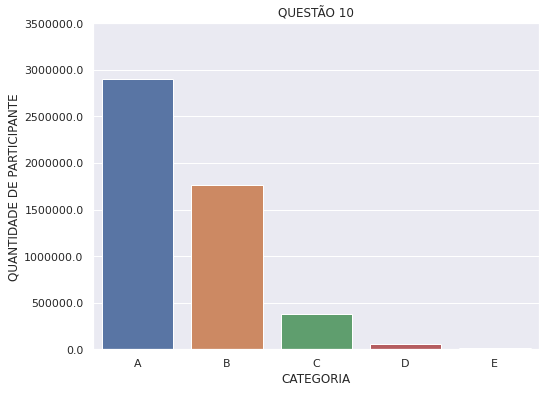

In [224]:
plot_quest(df_quest_socioec, 'Q010', 'QUESTÃO 10', 
           'CATEGORIA', 'QUANTIDADE DE PARTICIPANTE', figSize=(8,6))

##### **Q011** Na sua residência tem motocicleta?
- **A** Não.
- **B** Sim, uma.
- **C** Sim, duas.
- **D** Sim, três.
- **E** Sim, quatro ou mais.

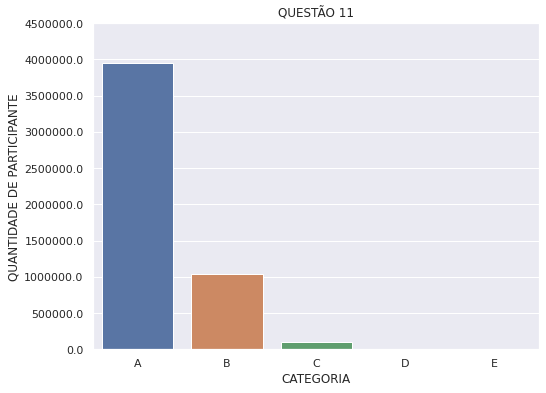

In [225]:
plot_quest(df_quest_socioec, 'Q011', 'QUESTÃO 11', 
           'CATEGORIA', 'QUANTIDADE DE PARTICIPANTE', figSize=(8,6))

##### **Q012** Na sua residência tem geladeira?
- **A** Não.
- **B** Sim, uma.
- **C** Sim, duas.
- **D** Sim, três.
- **E** Sim, quatro ou mais.


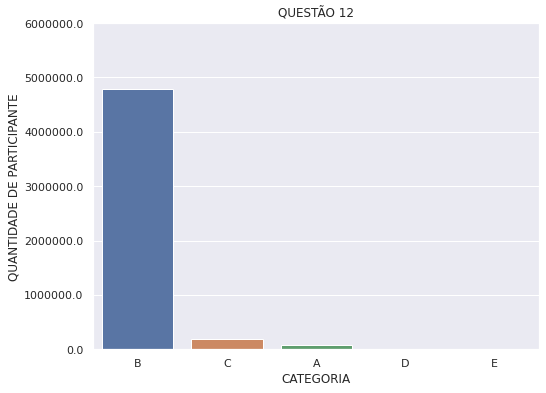

In [226]:
plot_quest(df_quest_socioec, 'Q012', 'QUESTÃO 12', 
           'CATEGORIA', 'QUANTIDADE DE PARTICIPANTE', figSize=(8,6))

##### **Q013** Na sua residência tem freezer (independente ou segunda porta da geladeira?
- **A** Não.
- **B** Sim, um.
- **C** Sim, dois.
- **D** Sim, três.
- **E** Sim, quatro ou mais.

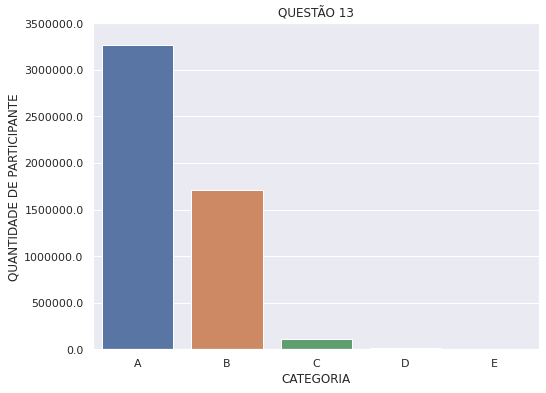

In [227]:
plot_quest(df_quest_socioec, 'Q013', 'QUESTÃO 13', 
           'CATEGORIA', 'QUANTIDADE DE PARTICIPANTE', figSize=(8,6))

##### **Q014** Na sua residência tem máquina de lavar roupa? (o tanquinho NÃO deve ser considerado)
- **A** Não.
- **B** Sim, um.
- **C** Sim, dois.
- **D** Sim, três.
- **E** Sim, quatro ou mais.


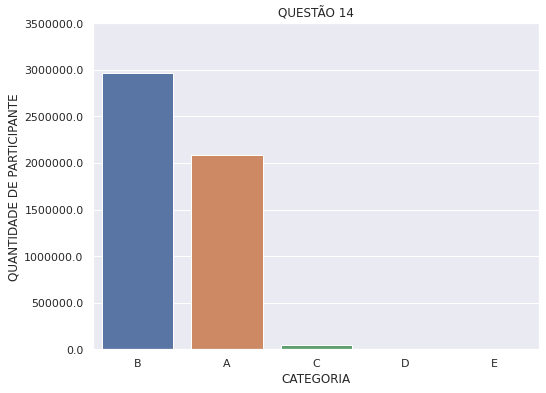

In [228]:
plot_quest(df_quest_socioec, 'Q014', 'QUESTÃO 14', 
           'CATEGORIA', 'QUANTIDADE DE PARTICIPANTE', figSize=(8,6))

##### **Q015** Na sua residência tem máquina de secar roupa (independente ou em conjunto com a máquina de lavar roupa)?
- **A** Não.
- **B** Sim, um.
- **C** Sim, dois.
- **D** Sim, três.
- **E** Sim, quatro ou mais.

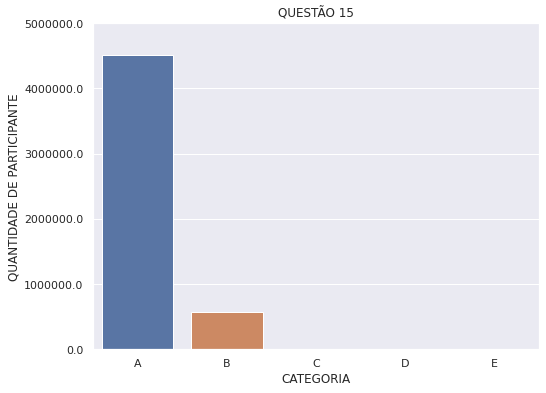

In [229]:
plot_quest(df_quest_socioec, 'Q015', 'QUESTÃO 15', 
           'CATEGORIA', 'QUANTIDADE DE PARTICIPANTE', figSize=(8,6))

##### **Q016** Na sua residência tem forno micro-ondas?
- **A** Não.
- **B** Sim, um.
- **C** Sim, dois.
- **D** Sim, três.
- **E** Sim, quatro ou mais.

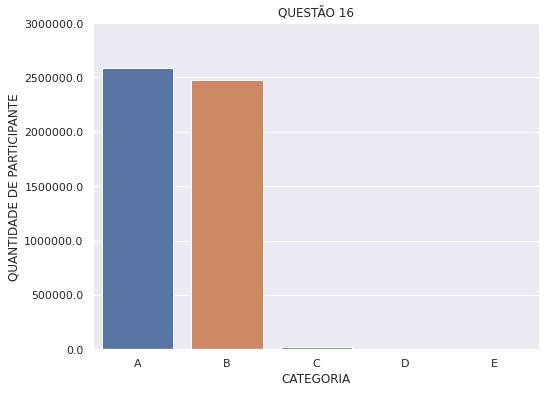

In [230]:
plot_quest(df_quest_socioec, 'Q016', 'QUESTÃO 16', 
           'CATEGORIA', 'QUANTIDADE DE PARTICIPANTE', figSize=(8,6))

##### **Q017** Na sua residência tem máquina de lavar louça?
- **A** Não.
- **B** Sim, um.
- **C** Sim, dois.
- **D** Sim, três.
- **E** Sim, quatro ou mais.

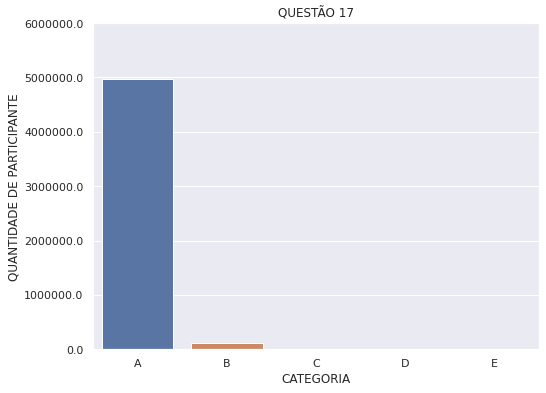

In [231]:
plot_quest(df_quest_socioec, 'Q017', 'QUESTÃO 17', 
           'CATEGORIA', 'QUANTIDADE DE PARTICIPANTE', figSize=(8,6))

##### **Q018** Na sua residência tem aspirador de pó?
- **A** Não.
- **B** Sim.

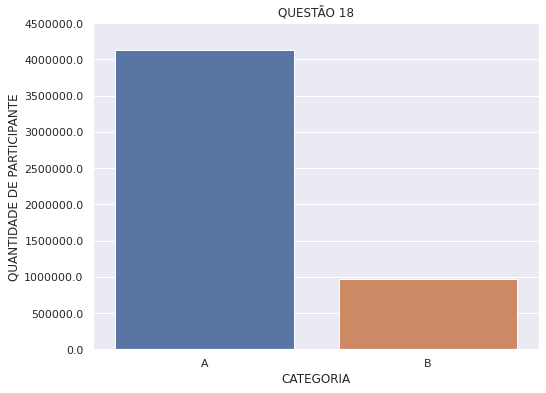

In [232]:
plot_quest(df_quest_socioec, 'Q018', 'QUESTÃO 18', 
           'CATEGORIA', 'QUANTIDADE DE PARTICIPANTE', figSize=(8,6))

##### **Q019** Na sua residência tem televisão em cores?
- **A** Não.
- **B** Sim, um.
- **C** Sim, dois.
- **D** Sim, três.
- **E** Sim, quatro ou mais.

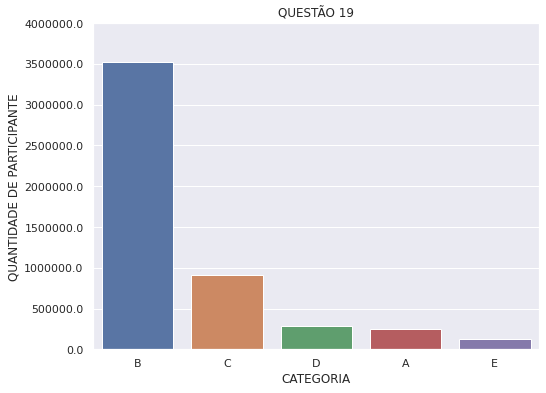

In [233]:
plot_quest(df_quest_socioec, 'Q019', 'QUESTÃO 19', 
           'CATEGORIA', 'QUANTIDADE DE PARTICIPANTE', figSize=(8,6))

##### **Q020** Na sua residência tem aparelho de DVD?
- **A** Não.
- **B** Sim.

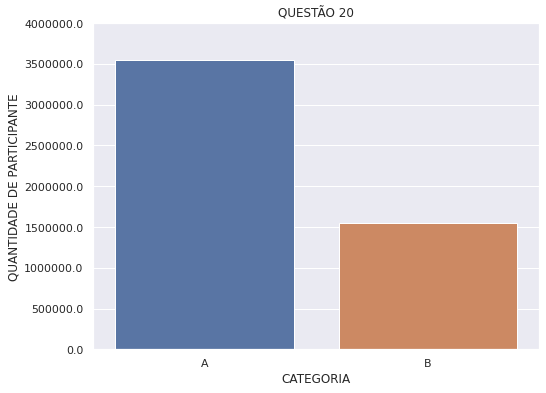

In [234]:
plot_quest(df_quest_socioec, 'Q020', 'QUESTÃO 20', 
           'CATEGORIA', 'QUANTIDADE DE PARTICIPANTE', figSize=(8,6))

##### **Q021** Na sua residência tem TV por assinatura?
- **A** Não.
- **B** Sim.

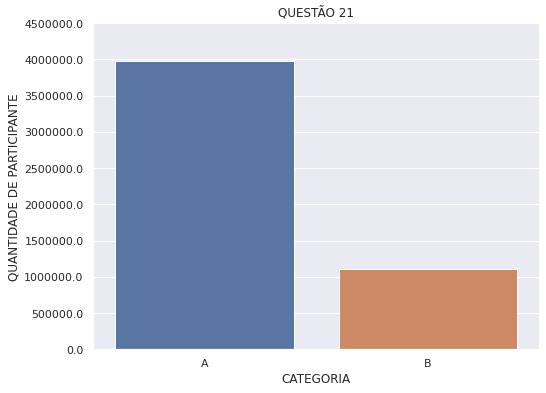

In [235]:
plot_quest(df_quest_socioec, 'Q021', 'QUESTÃO 21', 
           'CATEGORIA', 'QUANTIDADE DE PARTICIPANTE', figSize=(8,6))

##### **Q022** Na sua residência tem telefone celular?
- **A** Não.
- **B** Sim, um.
- **C** Sim, dois.
- **D** Sim, três.
- **E** Sim, quatro ou mais.

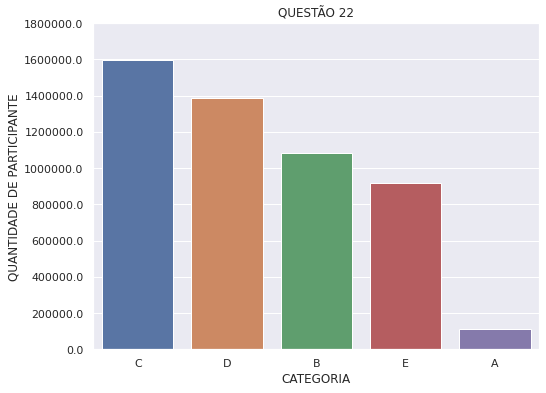

In [236]:
plot_quest(df_quest_socioec, 'Q022', 'QUESTÃO 22', 
           'CATEGORIA', 'QUANTIDADE DE PARTICIPANTE', figSize=(8,6))

##### **Q023** Na sua residência tem telefone fixo?
- **A** Não.
- **B** Sim.

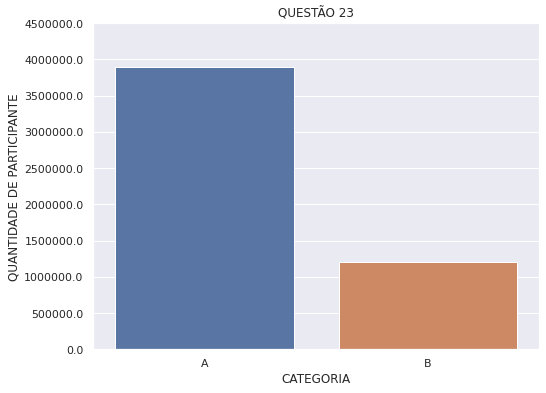

In [237]:
plot_quest(df_quest_socioec, 'Q023', 'QUESTÃO 23', 
           'CATEGORIA', 'QUANTIDADE DE PARTICIPANTE', figSize=(8,6))

##### **Q024** Na sua residência tem computador?
- **A** Não.
- **B** Sim, um.
- **C** Sim, dois.
- **D** Sim, três.
- **E** Sim, quatro ou mais.

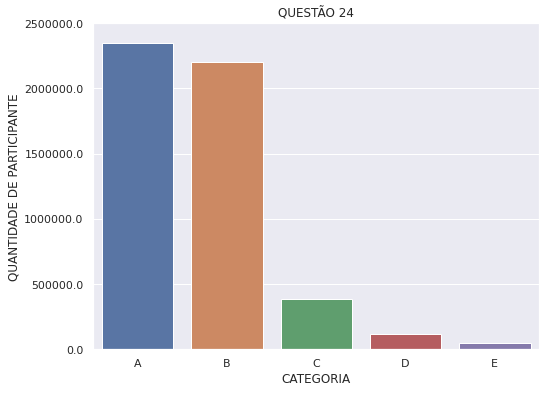

In [238]:
plot_quest(df_quest_socioec, 'Q024', 'QUESTÃO 24', 
           'CATEGORIA', 'QUANTIDADE DE PARTICIPANTE', figSize=(8,6))

##### **Q025** Na sua residência tem acesso à Internet?
- **A** Não.
- **B** Sim.

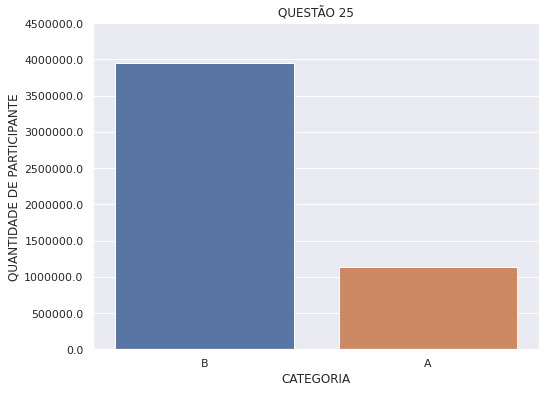

In [239]:
plot_quest(df_quest_socioec, 'Q025', 'QUESTÃO 25', 
           'CATEGORIA', 'QUANTIDADE DE PARTICIPANTE', figSize=(8,6))

##### Agrupamento por renda mensal da família:

- **A** Nenhuma renda.

- **B** Até R$ 998,00.

- **C** De R\$ 998,01  até  R\$ 1.497,00.

- **D** De R\$ 1.497,01 até R\$ 1.996,00.

- **E** De R\$ 1.996,01 até R\$ 2.495,00.

- **F** De R\$ 2.495,01 até R\$ 2.994,00.

- **G** De R\$ 2.994,01 até R\$ 3.992,00.

- **H** De R\$ 3.992,01 até R\$ 4.990,00.

- **I** De R\$ 4.990,01 até R\$ 5.988,00.

- **J** De R\$ 5.988,01 até R\$ 6.986,00.

- **K** De R\$ 6.986,01 até R\$ 7.984,00.

- **L** De R\$ 7.984,01 até R\$ 8.982,00.

- **M** De R\$ 8.982,01 até R\$ 9.980,00.

- **N** De R\$ 9.980,01 até  R\$ 11.976,00.

- **O** De R\$ 11.976,01 até R\$ 14.970,00.

- **P** De R\$ 14.970,01 até R\$ 19.960,00.

- **Q** Mais de R$ 19.960,00.

In [240]:
df_quest_socioec.head()

,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,D,E,A,A,7,B,A,B,C,A,A,B,A,B,A,A,A,A,C,B,A,D,A,B,A
1,D,E,A,A,5,B,A,B,C,A,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A
2,H,E,A,D,3,C,D,E,E,C,A,B,C,B,A,B,A,A,D,B,B,D,A,C,B
3,D,D,A,B,3,C,A,B,C,A,A,B,A,A,A,A,A,A,C,A,A,D,A,A,A
4,B,C,A,A,5,C,A,C,B,A,B,B,A,B,A,A,A,A,B,A,A,D,A,A,A


In [272]:
df_quest_socioec.isna().sum()

Q001    0
Q002    0
Q003    0
Q004    0
Q005    0
Q006    0
Q007    0
Q008    0
Q009    0
Q010    0
Q011    0
Q012    0
Q013    0
Q014    0
Q015    0
Q016    0
Q017    0
Q018    0
Q019    0
Q020    0
Q021    0
Q022    0
Q023    0
Q024    0
Q025    0
dtype: int64

In [250]:
df = df_quest_socioec.groupby(['Q006', 'Q005'])[['Q005']].count()

- Agurpamento de intervalo de renda e quantidade de pessoas que moram em uma residência:

In [280]:
df.rename(columns={'Q005': 'QUANTIDADE'}, inplace=True)

In [328]:
df = df.reset_index().rename(columns={'Q005': 'QTD_PESSOAS', 'Q006': 'CATEGORIA_RENDA'})

- Nenhuma renda.

In [333]:
df[df['CATEGORIA_RENDA'] == 'A']

,CATEGORIA_RENDA,QTD_PESSOAS,QUANTIDADE
0,A,1,18277
1,A,2,39097
2,A,3,53048
3,A,4,57785
4,A,5,34255
5,A,6,15135
6,A,7,7371
7,A,8,3491
8,A,9,1398
9,A,10,1173


- Até R$ 998,00

In [334]:
df[df['CATEGORIA_RENDA'] == 'B']

,CATEGORIA_RENDA,QTD_PESSOAS,QUANTIDADE
20,B,1,44752
21,B,2,186565
22,B,3,313903
23,B,4,346798
24,B,5,213739
25,B,6,91113
26,B,7,40858
27,B,8,19051
28,B,9,7337
29,B,10,5113


- De R\$ 998,01 até  R\$ 1.497,00.

In [336]:
df.query('CATEGORIA_RENDA == "C"')

,CATEGORIA_RENDA,QTD_PESSOAS,QUANTIDADE
40,C,1,44373
41,C,2,187932
42,C,3,325766
43,C,4,391719
44,C,5,211097
45,C,6,82538
46,C,7,38245
47,C,8,16177
48,C,9,6023
49,C,10,4293


- De R\$ 1.497,01 até R\$ 1.996,00.

In [337]:
df.query('CATEGORIA_RENDA == "D"')

,CATEGORIA_RENDA,QTD_PESSOAS,QUANTIDADE
60,D,1,10318
61,D,2,66704
62,D,3,138472
63,D,4,158685
64,D,5,77409
65,D,6,29167
66,D,7,10565
67,D,8,4655
68,D,9,1761
69,D,10,1010


### 8. Conclusão

Conseguimos fazer uma análise exploratória básica dos Microdados do Enem 2019, pórem ainda é possivel extrair muito mais informação desse set de dados. Destes dados foi extraido informações relacionadas a idade, sexo, tipo de escola, cor/raça, notas e condições socioeconômicas do participante.